In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import pubchempy as pcp

In [3]:
ThermoProperties = pd.read_csv('ThermoProperties.csv')
ThermoProperties.tail()

,name,molweight,critical temperature (K),acentric factor,boiling point (K)
6026,water,18.01528,647.13,0.3449,373.15
6027,xylenes,106.16740,620.21,0.3170,413.15
6028,zirconium bromide,410.84000,805.00,0.3100,633.15
6029,zirconium chloride,233.03480,778.00,0.2980,604.15
6030,zirconium iodide,598.84188,960.00,0.3430,704.15


626.32788


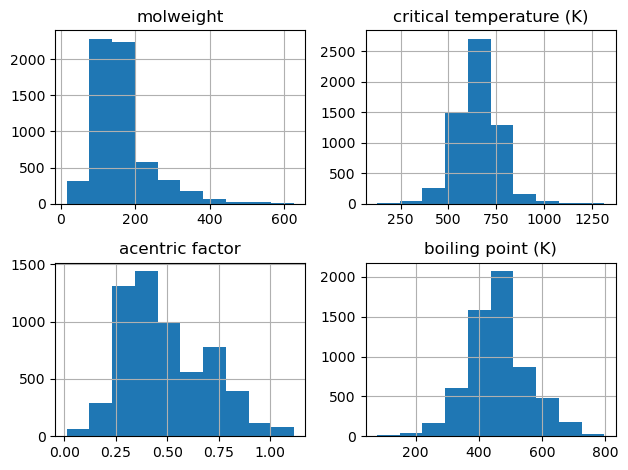

In [7]:
ThermoProperties.hist()
plt.tight_layout()
print(ThermoProperties['molweight'].max())
plt.show()

In [61]:
px.density_heatmap(ThermoProperties, x = 'boiling point (K)', y='acentric factor')

In [18]:
fig = px.density_heatmap(ThermoProperties, x='boiling point (K)', y='critical temperature (K)', animation_frame='molweight')
fig["layout"].pop("updatemenus")
fig.show()

In [80]:
fig = go.Figure()

#setup for uniform color scaling
cmin = 300
cmax = 0


#add traces for each slider step
interval = 20
for step in np.arange(ThermoProperties['molweight'].min() + interval, ThermoProperties['molweight'].max()-interval, interval):
    fig.add_trace(
        go.Histogram2dContour(
            x=ThermoProperties.loc[(ThermoProperties['molweight']<= step + interval) & (ThermoProperties['molweight']>= step - interval) ]['boiling point (K)'], 
            y=ThermoProperties.loc[(ThermoProperties['molweight']<= step + interval) & (ThermoProperties['molweight']>= step - interval) ]['critical temperature (K)'],
            zmin = cmin,
            zmax = cmax)
    )

fig.update_xaxes(title = 'boiling point (K)', range=[50, 800])
fig.update_yaxes(title = 'critical temperature (K)', range=[100, 1350])
fig.update_traces(zmin = cmin)
fig.update_traces(zmax = cmax)
# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
allsteps = np.arange(ThermoProperties['molweight'].min() + interval, ThermoProperties['molweight'].max()-interval, interval)
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Molecular Weight: " + str(round(allsteps[i]))},
              {"zmin":cmin, "zmax":cmax}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Molecular Weight: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)
fig.update_xaxes(fixedrange=True)
fig.show()